In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('/Users/yareshvijayasundaram/Downloads/Clustering Clean Ads_Data-2.xlsx')

# Part 1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [3]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [4]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [5]:
df.shape

(23066, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [7]:
df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [8]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [9]:
df.duplicated().sum()

0

# Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

In [10]:
df['CTR'].replace(r'^\s+$', np.nan)
df['CPM'].replace(r'^\s+$', np.nan)
df['CPC'].replace(r'^\s+$', np.nan)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23061    NaN
23062    NaN
23063    NaN
23064    NaN
23065    NaN
Name: CPC, Length: 23066, dtype: float64

In [11]:
def calculate_ctr(x):
    clicks=df.Clicks
    impressions=df.Impressions
    CTR = (clicks/(impressions)*100)
    return CTR

In [12]:
df['CTR']= df[['CTR']].apply(lambda x: calculate_ctr(x))

In [13]:
def calculate_cpm(x):
    spend=df.Spend
    impressions=df.Impressions
    CPM = (spend/(impressions)*1000)
    return CPM

In [14]:
df['CPM']= df[['CPM']].apply(lambda x: calculate_cpm(x))

In [15]:
def calculate_cpc(x):
    spend=df.Spend
    clicks=df.Clicks
    CPC = (spend/(clicks))
    return CPC

In [16]:
df['CPC']= df[['CPC']].apply(lambda x: calculate_cpc(x))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

# Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

In [18]:
 df1=df.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'],axis=1)

In [19]:
df1

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,20.0,0.04
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,50.0,0.05
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07


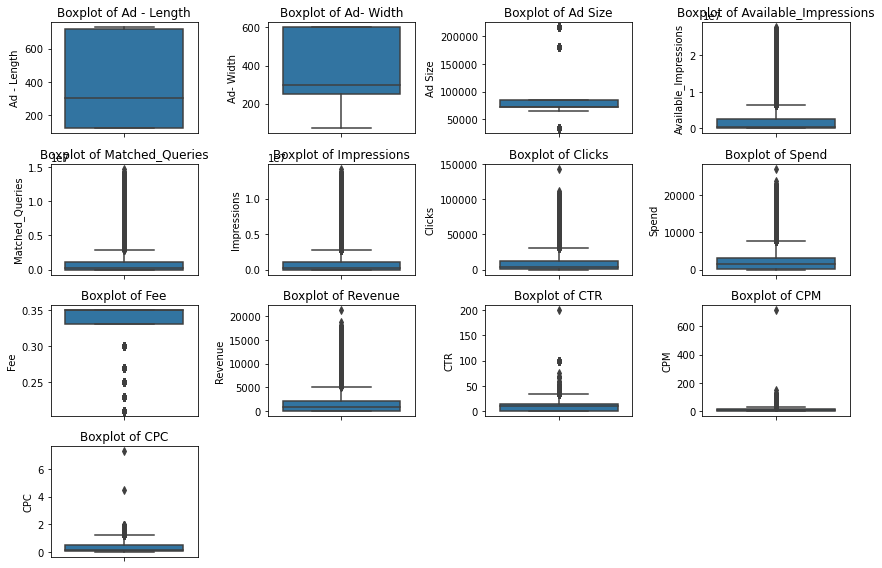

In [20]:
plt.figure(figsize=(12,8))
feature_list=df1.columns
for i in range(len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df1[feature_list[i]],data=df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [21]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [22]:
for i in feature_list:
    LL,UL=remove_outlier(df1[i])
    df1[i]=np.where(df1[i]>UL,UL,df1[i])
    df1[i]=np.where(df1[i]<LL,LL,df1[i])

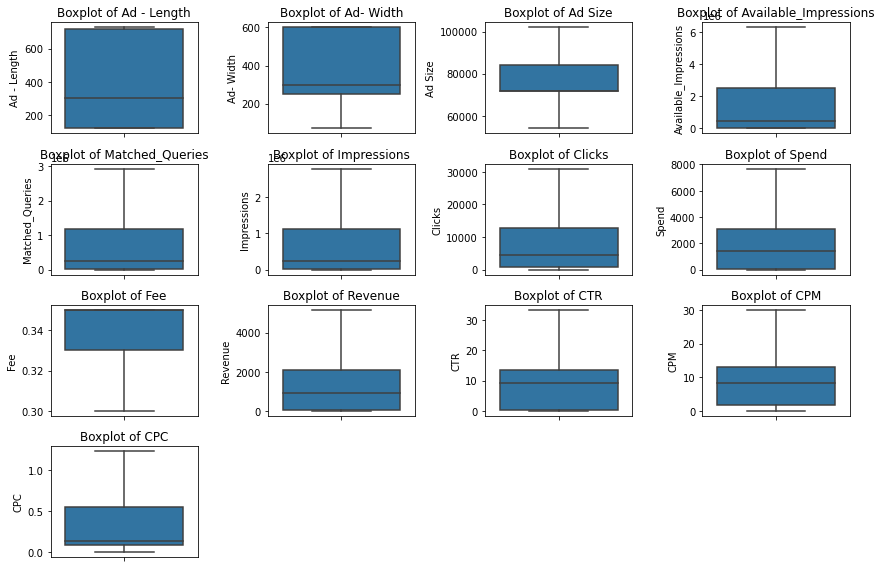

In [23]:
plt.figure(figsize=(12,8))
feature_list=df1.columns
for i in range(len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df1[feature_list[i]],data=df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

# Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [24]:
from scipy.stats import zscore
df1_scaled=df1.apply(zscore)

In [25]:
df1_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.946281,-1.194498,-1.042561


# Part 1 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage 

In [27]:
wardlink = linkage(df1_scaled, method='ward', metric='euclidean')

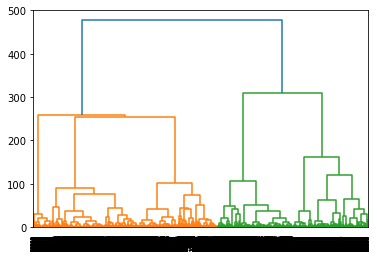

In [28]:
dend=dendrogram(wardlink)

# Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [29]:
from sklearn.cluster import KMeans

In [30]:
wss=[]

In [31]:
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(df1_scaled)
    wss.append(KM.inertia_)

In [32]:
wss

[299858.00000000035,
 183349.1043840473,
 130878.3478874286,
 95573.82516116044,
 61539.189197853884,
 51676.8923070996,
 44598.262116139085,
 40736.2046538579,
 36061.74152287154,
 32980.93586739367]

In [33]:
a=[1,2,3,4,5,6,7,8,9,10]

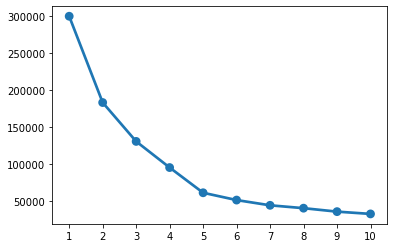

In [34]:
sns.pointplot(a, wss);

# Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [36]:
for i in range(2,11):
    k_means=KMeans(n_clusters=i,random_state=1)
    k_means.fit(df1_scaled)
    labels=k_means.labels_
    print('silhouette_score for',i,'Clusters:',silhouette_score(df1_scaled,labels))
    

silhouette_score for 2 Clusters: 0.3857276961910116
silhouette_score for 3 Clusters: 0.38254860365700916
silhouette_score for 4 Clusters: 0.4532427055259853
silhouette_score for 5 Clusters: 0.5240956940501869
silhouette_score for 6 Clusters: 0.5221533662938672
silhouette_score for 7 Clusters: 0.5165635029478554
silhouette_score for 8 Clusters: 0.4797224989383805
silhouette_score for 9 Clusters: 0.43206365640251304
silhouette_score for 10 Clusters: 0.4312485458108503


# Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [37]:
k_means=KMeans(n_clusters=5)
k_means.fit(df1_scaled)
labels=k_means.labels_

In [38]:
df['C_kmeans']=labels
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,C_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,1
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,1
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,1
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,1
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,1


In [39]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['Clicks'],aggfunc=np.mean)

Device Type,Desktop,Mobile
C_kmeans,,
0,14541.243713,14331.704923
1,3267.725314,3260.603163
2,1950.679487,1894.185946
3,11312.535836,11207.966396
4,65285.184919,65332.222449


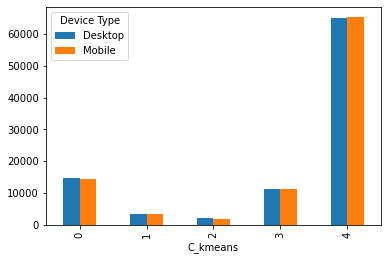

In [40]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['Clicks'],aggfunc=np.mean).plot(kind='bar');

In [41]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['Spend'],aggfunc=np.mean)

Device Type,Desktop,Mobile
C_kmeans,,
0,1251.027671,1252.984401
1,1495.319825,1502.717003
2,209.291786,209.090363
3,8637.451242,8651.852032
4,6972.607522,7000.451337


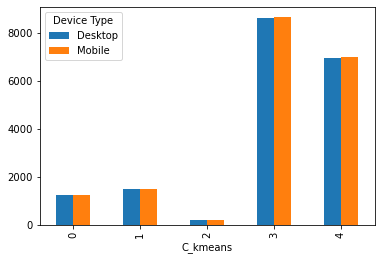

In [42]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['Spend'],aggfunc=np.mean).plot(kind='bar');

In [43]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['Revenue'],aggfunc=np.mean)

Device Type,Desktop,Mobile
C_kmeans,,
0,814.675848,816.022933
1,974.211859,979.192636
2,136.091814,135.938327
3,6366.972127,6377.444079
4,5002.676306,5025.985350


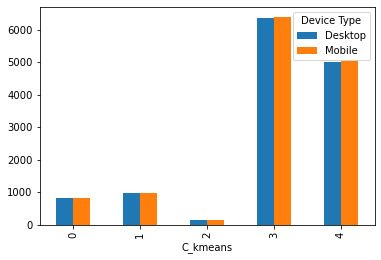

In [44]:

pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['Revenue'],aggfunc=np.mean).plot(kind='bar');

In [45]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['CPM'],aggfunc=np.mean)

Device Type,Desktop,Mobile
C_kmeans,,
0,12.069679,12.114045
1,1.789589,1.788258
2,14.514239,14.793727
3,1.561860,1.579743
4,15.431593,15.359699


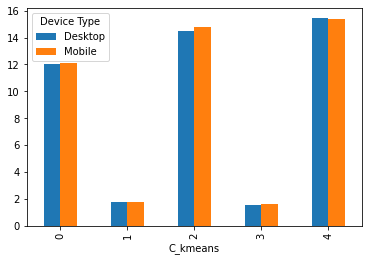

In [46]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['CPM'],aggfunc=np.mean).plot(kind='bar');

In [47]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['CTR'],aggfunc=np.mean)

Device Type,Desktop,Mobile
C_kmeans,,
0,13.823352,13.876035
1,0.408147,0.402325
2,16.053553,16.029142
3,0.217558,0.217063
4,13.793226,13.729611


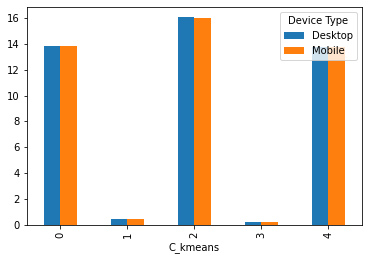

In [48]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['CTR'],aggfunc=np.mean).plot(kind='bar');

In [49]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['CPC'],aggfunc=np.mean)

Device Type,Desktop,Mobile
C_kmeans,,
0,0.089394,0.090356
1,0.540612,0.546817
2,0.102897,0.102737
3,0.754708,0.764450
4,0.111911,0.111922


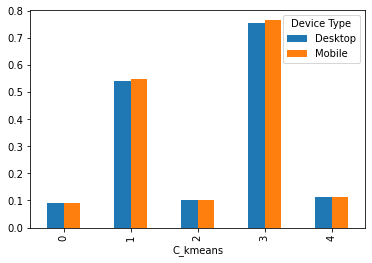

In [50]:
pd.crosstab(df['C_kmeans'], df['Device Type'],values=df['CPC'],aggfunc=np.mean).plot(kind='bar');

*****************************  ******************************** ***********************************

# Part 2 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

In [113]:
df_p=pd.read_excel('/Users/yareshvijayasundaram/Downloads/PCA India Data_Census.xlsx')

In [114]:
df_p.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [115]:
df_p.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [116]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [117]:
df_p.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State Code,640.0,NaN,NaN,NaN,17.114062,9.426486,1.0,9.0,18.0,24.0,35.0
Dist.Code,640.0,NaN,NaN,NaN,320.5,184.896367,1.0,160.75,320.5,480.25,640.0
State,640,35,Uttar Pradesh,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Name,640,635,Raigarh,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_HH,640.0,NaN,NaN,NaN,51222.871875,48135.405475,350.0,19484.0,35837.0,68892.0,310450.0
...,...,...,...,...,...,...,...,...,...,...,...
MARG_HH_0_3_F,640.0,NaN,NaN,NaN,1293.43125,1585.377936,0.0,298.0,717.0,1710.75,13714.0
MARG_OT_0_3_M,640.0,NaN,NaN,NaN,71.379688,107.897627,0.0,14.0,35.0,79.0,895.0
MARG_OT_0_3_F,640.0,NaN,NaN,NaN,200.742188,309.740854,0.0,43.0,113.0,240.0,3354.0
NON_WORK_M,640.0,NaN,NaN,NaN,510.014063,610.603187,0.0,161.0,326.0,604.5,6456.0


In [118]:
df_p.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [119]:
df_p['Area Name'].value_counts()

Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: Area Name, Length: 635, dtype: int64

In [120]:
df_p['State'].value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [121]:
df_p.duplicated().sum()

0

In [122]:
df_p.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

# Part 2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

1.	Which State has highest number of literates men and which state has lowest literates men ?

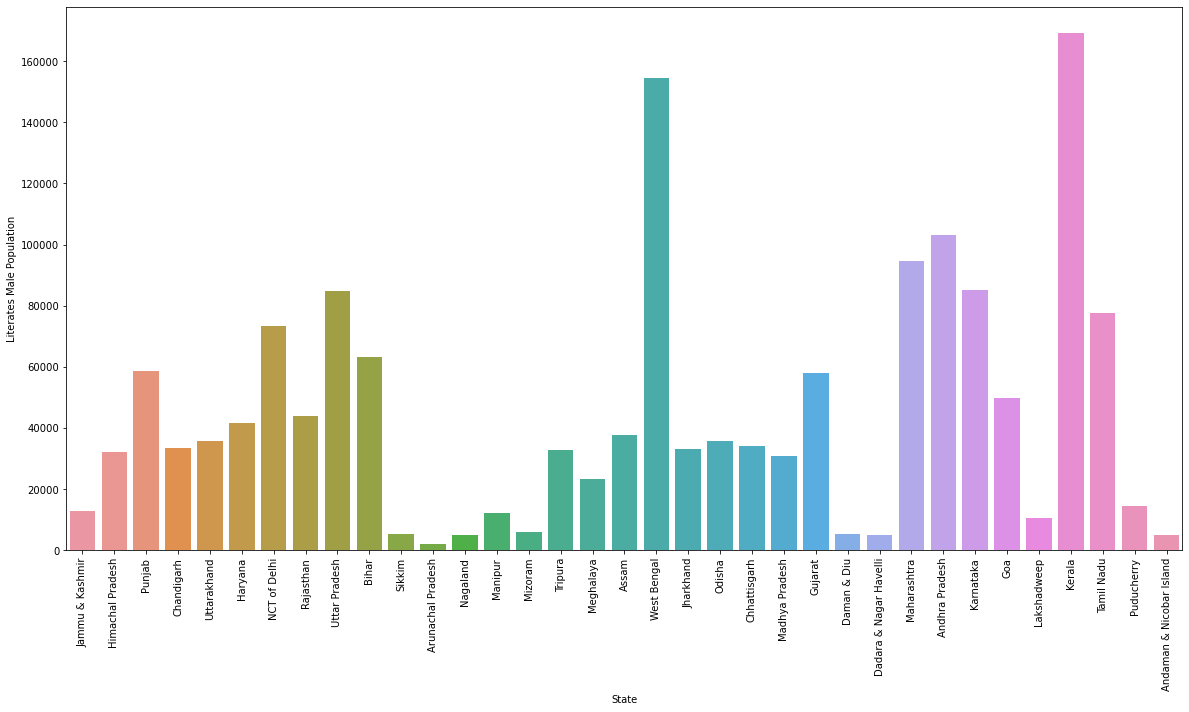

In [123]:
plt.figure(figsize=(20,10))
sns.barplot(df_p['State'],df_p['M_LIT'],ci=False)
plt.ylabel('Literates Male Population')
plt.xticks(rotation=90);

2. Which state has the highest and lowest non-working population Female?

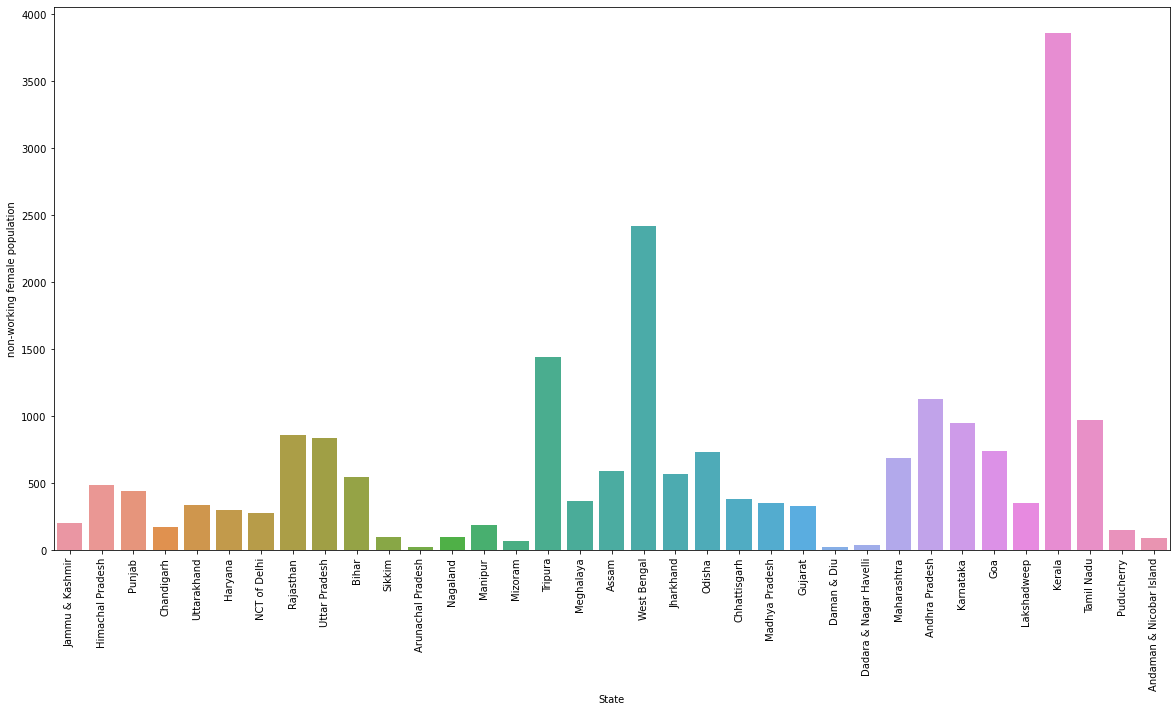

In [124]:
plt.figure(figsize=(20,10))
sns.barplot(df_p['State'],df_p['NON_WORK_F'],ci=False)
plt.ylabel('non-working female population')
plt.xticks(rotation=90);

3.Which state has highest gender ratio and which has the lowest?

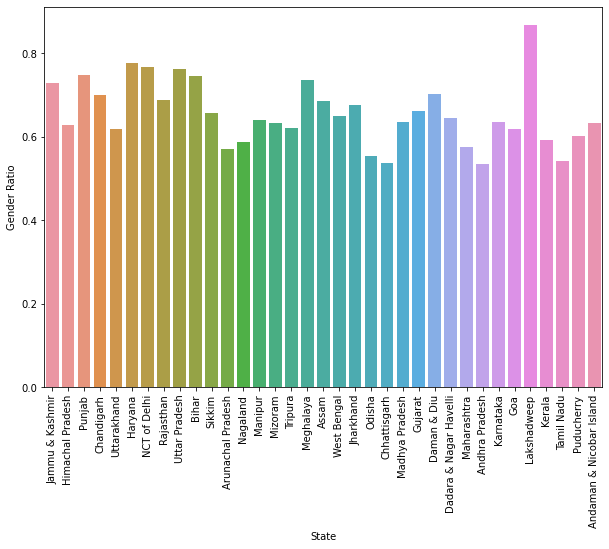

In [125]:
plt.figure(figsize=(10,7))
sns.barplot(df_p['State'],df_p['TOT_M']/df_p['TOT_F'],ci=False);
plt.ylabel('Gender Ratio');
plt.xticks(rotation=90);
plt.show;

4. which state has the highest and the lowest Scheduled Tribes population Male?

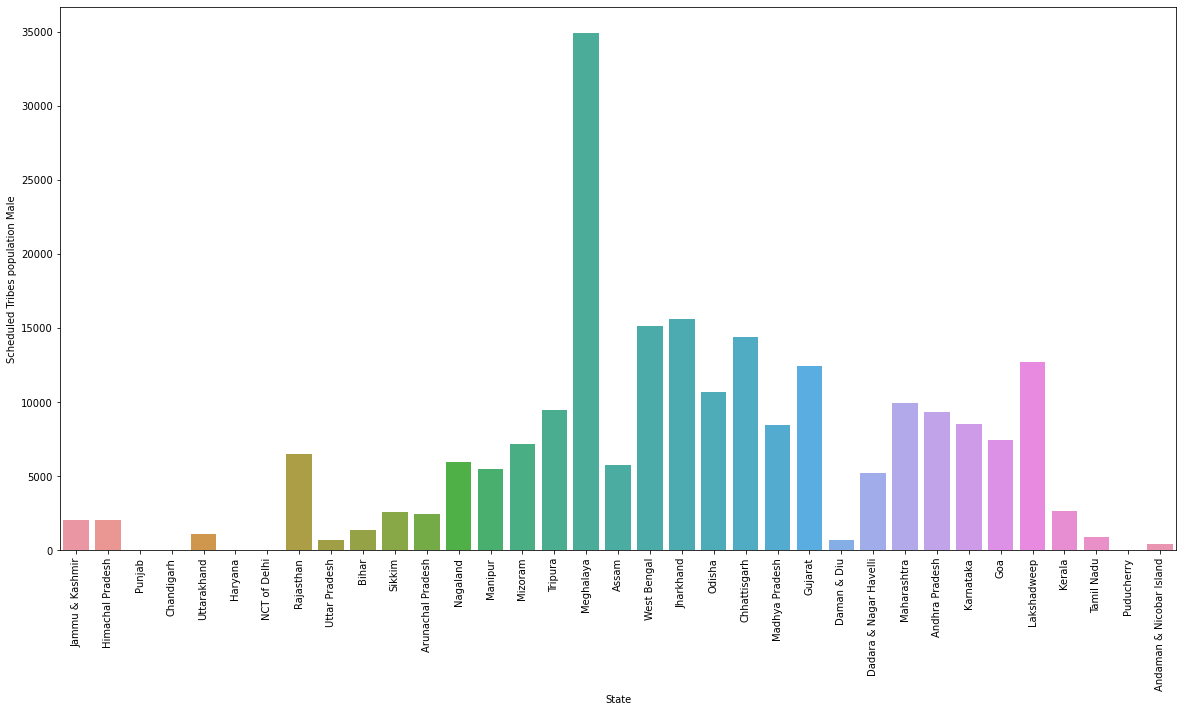

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(df_p['State'],df_p['M_ST'],ci=False)
plt.ylabel('Scheduled Tribes population Male')
plt.xticks(rotation=90);

5. Which state has highest and lowest main cultivator population male?

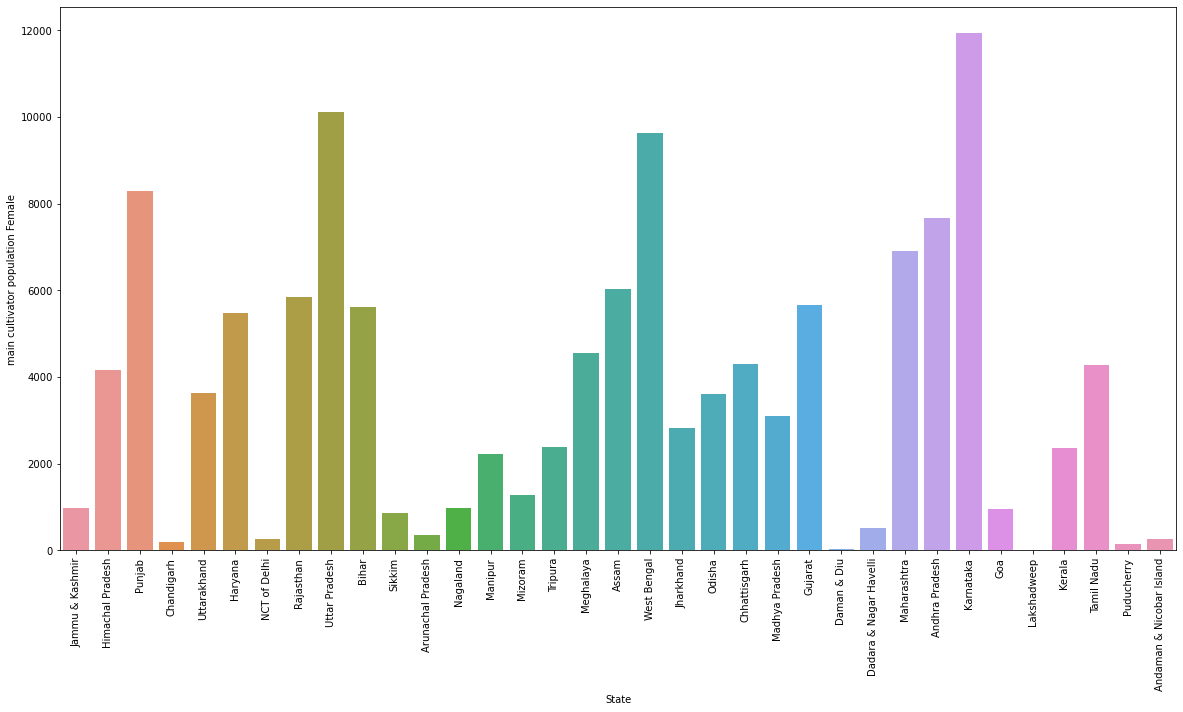

In [127]:
plt.figure(figsize=(20,10))
sns.barplot(df_p['State'],df_p['MAIN_CL_M'],ci=False)
plt.ylabel('main cultivator population Female')
plt.xticks(rotation=90);

6.	Which state has the highest and lowest Main Agricultural Labourers Population Female?

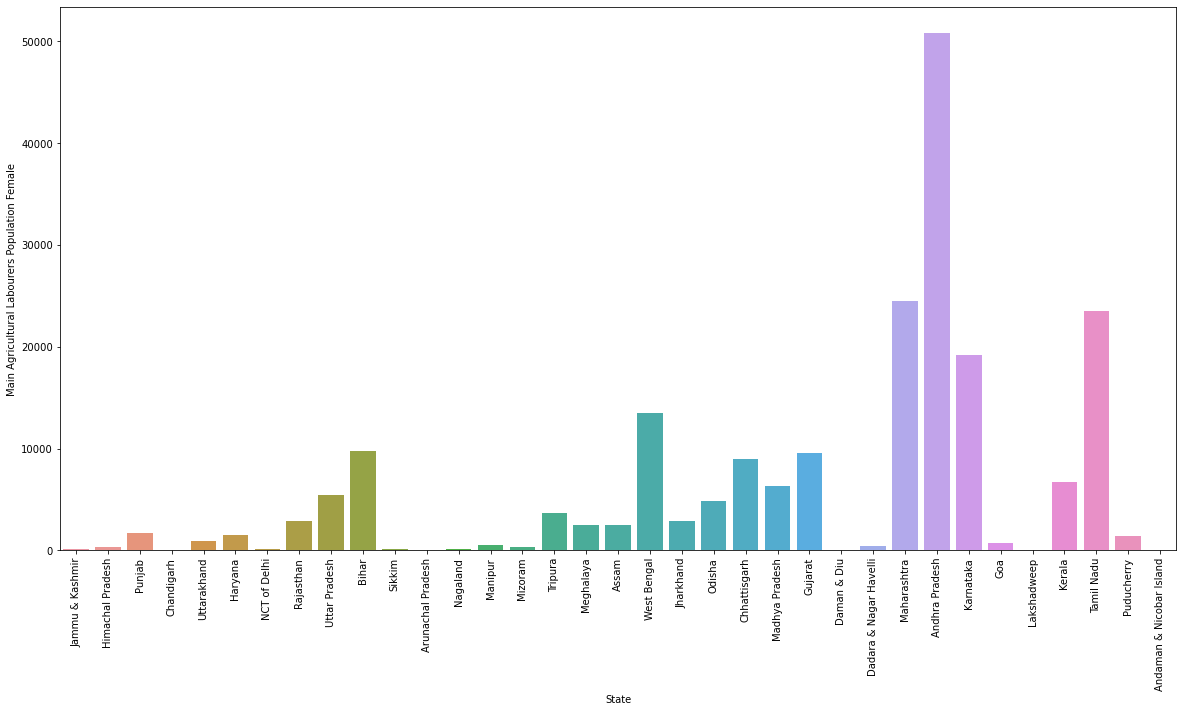

In [128]:
plt.figure(figsize=(20,10))
sns.barplot(df_p['State'],df_p['MAIN_AL_F'],ci=False)
plt.ylabel('Main Agricultural Labourers Population Female')
plt.xticks(rotation=90);

7.which state has least Main Agricultural Labourers Population Male?

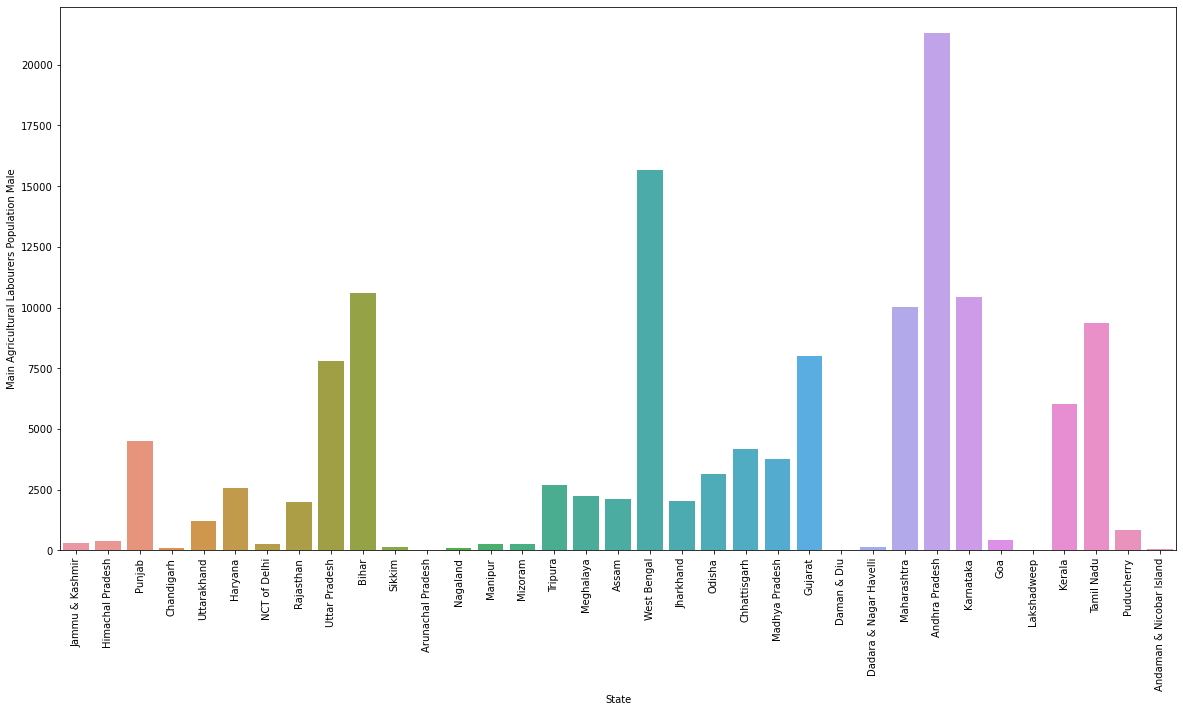

In [129]:
plt.figure(figsize=(20,10))
sns.barplot(df_p['State'],df_p['MAIN_AL_M'],ci=False)
plt.ylabel('Main Agricultural Labourers Population Male')
plt.xticks(rotation=90);

# Part 2 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

Principal Component Analysis (PCA) is a very versatile technique for dimension reduction in multivariate data. Classical PCA is very sensitive to outliers and can lead to misleading conclusions in the presence of outliers.

# Part 2 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [162]:
df_pca=df_p.drop(['State Code','Dist.Code','State','Area Name'],axis=1)

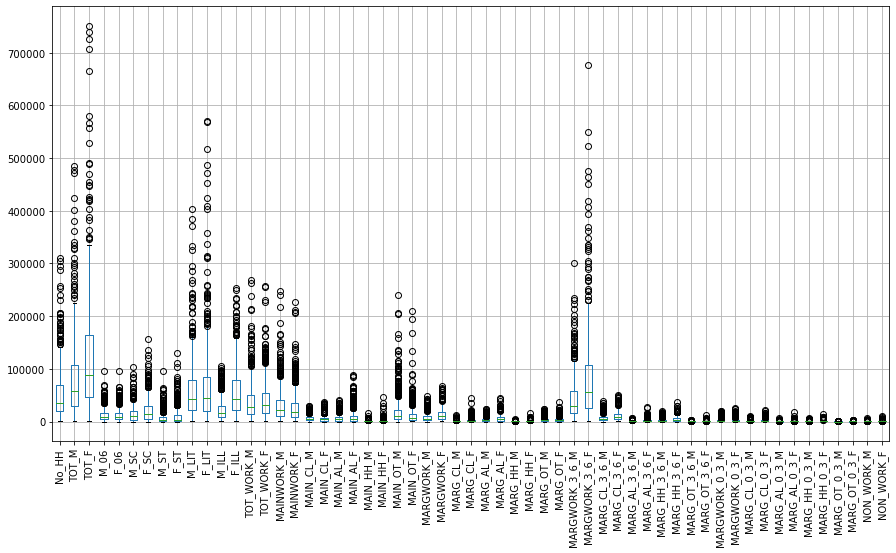

In [163]:
df_pca.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show()

In [164]:
from scipy.stats import zscore
df_scaled=df_pca.apply(zscore)

In [165]:
df_scaled

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.995677,-0.978990,-0.974268,-0.971387,-0.948916,-0.957326,-0.955667,-0.625124,-0.640197,-0.913820,...,-0.914299,-0.972530,-0.553861,-0.499744,-0.735831,-0.816489,-0.662068,-0.648604,-0.783468,-0.723232
636,-0.844340,-0.921822,-0.886965,-0.936754,-0.919757,-0.803806,-0.765670,-0.625124,-0.640197,-0.853390,...,-0.831668,-0.868461,-0.547238,-0.487208,-0.685961,-0.734425,-0.624966,-0.574290,-0.655625,-0.587993
637,-1.038465,-1.069066,-1.054885,-1.051356,-1.035331,-0.958783,-0.957049,-0.522953,-0.529880,-1.016367,...,-0.865930,-0.941309,-0.533992,-0.496162,-0.733206,-0.812701,-0.504388,-0.496746,-0.711352,-0.690247
638,-0.986758,-1.019276,-1.007472,-1.008195,-0.996541,-0.958783,-0.957049,-0.622297,-0.637046,-0.962328,...,-0.844432,-0.927673,-0.500878,-0.460344,-0.721395,-0.803232,-0.652792,-0.635680,-0.672015,-0.661660


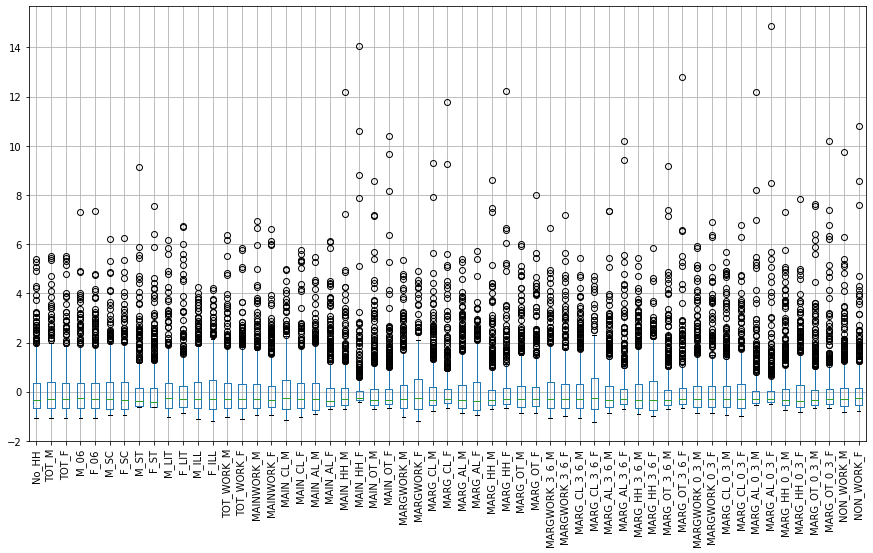

In [166]:
df_scaled.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show()

# Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [167]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value

0.0

In [168]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.8039889932781299

In [169]:
from sklearn.decomposition import PCA
pca=PCA(n_components=57,random_state=123)
df_pca=pca_transformed=pca.fit_transform(df_scaled)
df_pca.transpose()#

array([[-4.61726348e+00, -4.77166187e+00, -5.96483558e+00, ...,
        -6.29462500e+00, -6.22319199e+00, -5.89623627e+00],
       [ 1.38115857e-01, -1.05865351e-01, -2.94346892e-01, ...,
        -6.38126644e-01, -6.72319673e-01, -9.37169526e-01],
       [ 3.28544953e-01,  2.44448976e-01,  3.67393453e-01, ...,
         1.07482817e-01,  2.71325467e-01,  3.49218364e-01],
       ...,
       [-7.55741335e-18,  5.64090044e-16,  2.61252623e-15, ...,
         5.82011001e-16, -7.12387018e-16,  3.22120104e-16],
       [ 1.18557472e-15, -1.03197944e-16,  4.56998682e-16, ...,
         2.22730881e-16, -1.14902110e-16,  3.05797089e-16],
       [ 2.77630389e-15, -5.38576899e-16,  6.79076006e-16, ...,
        -2.36711464e-16,  1.26163563e-16, -4.63390846e-17]])

In [170]:
pca.components_#eigen vector 

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.35707146,  0.19665047, ...,  0.03591739,
        -0.0098253 , -0.02768831],
       [ 0.        ,  0.00998631, -0.00250899, ...,  0.02017974,
        -0.07939787,  0.04104616],
       [ 0.        , -0.21465651,  0.30242653, ...,  0.00471471,
        -0.1184565 ,  0.01737791]])

In [171]:
pca_transformed

array([[-4.61726348e+00,  1.38115857e-01,  3.28544953e-01, ...,
        -7.55741335e-18,  1.18557472e-15,  2.77630389e-15],
       [-4.77166187e+00, -1.05865351e-01,  2.44448976e-01, ...,
         5.64090044e-16, -1.03197944e-16, -5.38576899e-16],
       [-5.96483558e+00, -2.94346892e-01,  3.67393453e-01, ...,
         2.61252623e-15,  4.56998682e-16,  6.79076006e-16],
       ...,
       [-6.29462500e+00, -6.38126644e-01,  1.07482817e-01, ...,
         5.82011001e-16,  2.22730881e-16, -2.36711464e-16],
       [-6.22319199e+00, -6.72319673e-01,  2.71325467e-01, ...,
        -7.12387018e-16, -1.14902110e-16,  1.26163563e-16],
       [-5.89623627e+00, -9.37169526e-01,  3.49218364e-01, ...,
         3.22120104e-16,  3.05797089e-16, -4.63390846e-17]])

In [172]:
var_exp=pca.explained_variance_ 
var_exp#eigen value 

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 1.12676254e-30,
       1.06191652e-30, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 1.41787114e-31,
      

In [173]:
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 1.97368768e-32,
       1.86010049e-32, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 2.48360653e-33,
      

In [174]:
sum(pca.explained_variance_)

57.08920187793427

In [175]:
cov_matrix=np.cov(df_scaled.T)
print('covarience matrix: \n',cov_matrix)

covarience matrix: 
 [[1.00156495 0.91760364 0.97210871 ... 0.53769433 0.76357722 0.73684378]
 [0.91760364 1.00156495 0.98417823 ... 0.5891007  0.84621844 0.71718181]
 [0.97210871 0.98417823 1.00156495 ... 0.572748   0.82894851 0.74775097]
 ...
 [0.53769433 0.5891007  0.572748   ... 1.00156495 0.61052325 0.52191235]
 [0.76357722 0.84621844 0.82894851 ... 0.61052325 1.00156495 0.88228018]
 [0.73684378 0.71718181 0.74775097 ... 0.52191235 0.88228018 1.00156495]]


In [176]:
#Variance covariance matrix
np.round(df_scaled.cov(),2)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.00,0.92,0.97,0.80,0.80,0.78,0.83,0.15,0.17,0.93,...,0.56,0.56,0.07,0.05,0.37,0.42,0.49,0.54,0.76,0.74
TOT_M,0.92,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,...,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.85,0.72
TOT_F,0.97,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,...,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.80,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,...,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.79,0.65
F_06,0.80,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,...,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.58,0.78,0.65
M_SC,0.78,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,...,0.67,0.57,0.18,0.13,0.52,0.46,0.67,0.59,0.74,0.58
F_SC,0.83,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.82,...,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.15,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,...,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15
F_ST,0.17,0.09,0.13,0.04,0.05,-0.05,-0.01,0.99,1.00,0.09,...,0.12,0.22,0.02,0.00,0.14,0.27,-0.01,0.10,0.11,0.15
M_LIT,0.93,0.99,0.99,0.91,0.91,0.82,0.82,0.09,0.09,1.00,...,0.65,0.56,0.14,0.10,0.42,0.38,0.60,0.55,0.85,0.74


# Part 2 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [177]:
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 1.97368768e-32,
       1.86010049e-32, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 2.48360653e-33,
      

In [178]:
sum(pca.explained_variance_ratio_)

0.9999999999999997

In [179]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

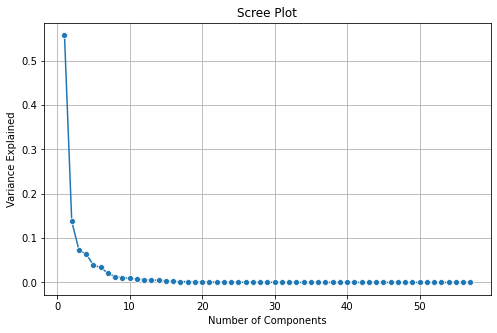

In [180]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [181]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [182]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose() # Component output

array([[-4.61726348, -4.77166187, -5.96483558, ..., -6.294625  ,
        -6.22319199, -5.89623627],
       [ 0.13811585, -0.10586536, -0.29434689, ..., -0.63812665,
        -0.67231967, -0.93716953],
       [ 0.32854489,  0.24444895,  0.36739354, ...,  0.10748279,
         0.27132545,  0.34921832],
       [ 1.54369714,  1.96321495,  0.61954271, ...,  1.36818692,
         1.14349288,  1.114861  ],
       [ 0.35373623, -0.15388429,  0.47819913, ...,  0.15374528,
         0.06043998,  0.14910357],
       [-0.42094803,  0.41730835,  0.27658052, ...,  0.14114473,
        -0.11568247, -0.15454413]])

In [183]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169])

In [184]:
sum(var_exp)

0.9047243049893395

In [185]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169])

In [186]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 ])

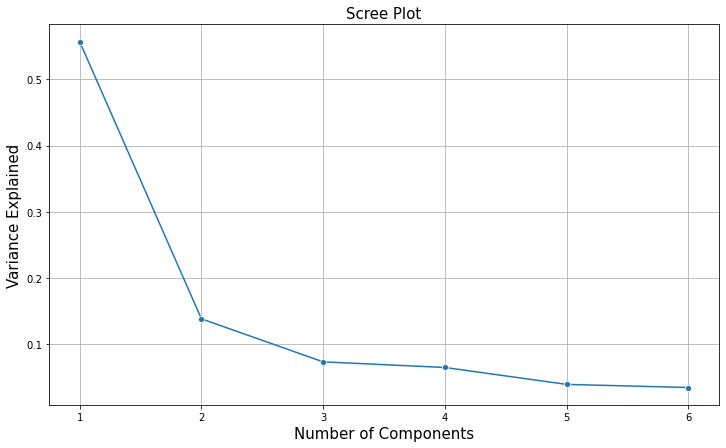

In [187]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

# PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [188]:
df1_pca_loading = pd.DataFrame(pca.components_, columns = list(df_scaled))
df1_pca_loading.shape

(6, 57)

In [189]:
df1_pca_loading

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.156021,0.167118,0.165553,0.162193,0.162566,0.151358,0.151567,0.027234,0.028183,0.161993,...,0.150126,0.140157,0.052542,0.041786,0.121840,0.116011,0.139869,0.132192,0.150376,0.131066
1,-0.126347,-0.089677,-0.104912,-0.022095,-0.020271,-0.045111,-0.051924,0.027679,0.030223,-0.115355,...,0.150681,0.180690,0.251328,0.240720,0.185277,0.180616,0.084869,0.050813,-0.065365,-0.073847
2,-0.002690,0.056698,0.038749,0.057788,0.050126,0.002569,-0.025101,-0.123504,-0.139769,0.082168,...,0.054892,0.023982,0.268330,0.284956,-0.138628,-0.202198,-0.022599,-0.078720,0.111827,0.102553
3,-0.125293,-0.019942,-0.070873,0.011917,0.014844,0.012485,-0.029893,-0.222247,-0.229754,-0.035163,...,0.087433,-0.022290,-0.104686,-0.135716,0.132544,0.004051,0.230038,0.206201,0.084854,0.021124
4,-0.007022,-0.033026,-0.012847,-0.050248,-0.043848,-0.173007,-0.159803,0.433163,0.438792,-0.009101,...,0.081185,0.129936,-0.048849,-0.051895,0.062380,0.128308,-0.036390,0.000165,0.162862,0.238292
5,0.004083,-0.073389,-0.043647,-0.157957,-0.154436,-0.064295,-0.040518,0.222591,0.225531,-0.055465,...,-0.060715,-0.001727,0.065409,0.083743,-0.124209,-0.105530,0.061228,0.295600,-0.052387,-0.024901


In [190]:
from matplotlib.patches import Rectangle

In [191]:
df1_pca_loading.abs().idxmax(axis=0)#Index location of max. value in every location. 

No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              4
F_SC              4
M_ST              4
F_ST              4
M_LIT             0
F_LIT             1
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        3
MAINWORK_M        1
MAINWORK_F        3
MAIN_CL_M         4
MAIN_CL_F         3
MAIN_AL_M         2
MAIN_AL_F         3
MAIN_HH_M         5
MAIN_HH_F         5
MAIN_OT_M         1
MAIN_OT_F         1
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         1
MARG_CL_F         2
MARG_AL_M         2
MARG_AL_F         2
MARG_HH_M         3
MARG_HH_F         5
MARG_OT_M         0
MARG_OT_F         4
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     1
MARG_AL_3_6_F     2
MARG_HH_3_6_M     2
MARG_HH_3_6_F     2
MARG_OT_3_6_M     3
MARG_OT_3_6_F     5
MARGWORK_0_3_M    0
MARGWORK_0_3_F    0
MARG_CL_0_3_M     1
MARG_CL_0_3_F     1
MARG_AL_0_3_M     2


In [192]:
list(enumerate(df1_pca_loading.columns))# 

[(0, 'No_HH'),
 (1, 'TOT_M'),
 (2, 'TOT_F'),
 (3, 'M_06'),
 (4, 'F_06'),
 (5, 'M_SC'),
 (6, 'F_SC'),
 (7, 'M_ST'),
 (8, 'F_ST'),
 (9, 'M_LIT'),
 (10, 'F_LIT'),
 (11, 'M_ILL'),
 (12, 'F_ILL'),
 (13, 'TOT_WORK_M'),
 (14, 'TOT_WORK_F'),
 (15, 'MAINWORK_M'),
 (16, 'MAINWORK_F'),
 (17, 'MAIN_CL_M'),
 (18, 'MAIN_CL_F'),
 (19, 'MAIN_AL_M'),
 (20, 'MAIN_AL_F'),
 (21, 'MAIN_HH_M'),
 (22, 'MAIN_HH_F'),
 (23, 'MAIN_OT_M'),
 (24, 'MAIN_OT_F'),
 (25, 'MARGWORK_M'),
 (26, 'MARGWORK_F'),
 (27, 'MARG_CL_M'),
 (28, 'MARG_CL_F'),
 (29, 'MARG_AL_M'),
 (30, 'MARG_AL_F'),
 (31, 'MARG_HH_M'),
 (32, 'MARG_HH_F'),
 (33, 'MARG_OT_M'),
 (34, 'MARG_OT_F'),
 (35, 'MARGWORK_3_6_M'),
 (36, 'MARGWORK_3_6_F'),
 (37, 'MARG_CL_3_6_M'),
 (38, 'MARG_CL_3_6_F'),
 (39, 'MARG_AL_3_6_M'),
 (40, 'MARG_AL_3_6_F'),
 (41, 'MARG_HH_3_6_M'),
 (42, 'MARG_HH_3_6_F'),
 (43, 'MARG_OT_3_6_M'),
 (44, 'MARG_OT_3_6_F'),
 (45, 'MARGWORK_0_3_M'),
 (46, 'MARGWORK_0_3_F'),
 (47, 'MARG_CL_0_3_M'),
 (48, 'MARG_CL_0_3_F'),
 (49, 'MARG_AL_0_3_M')

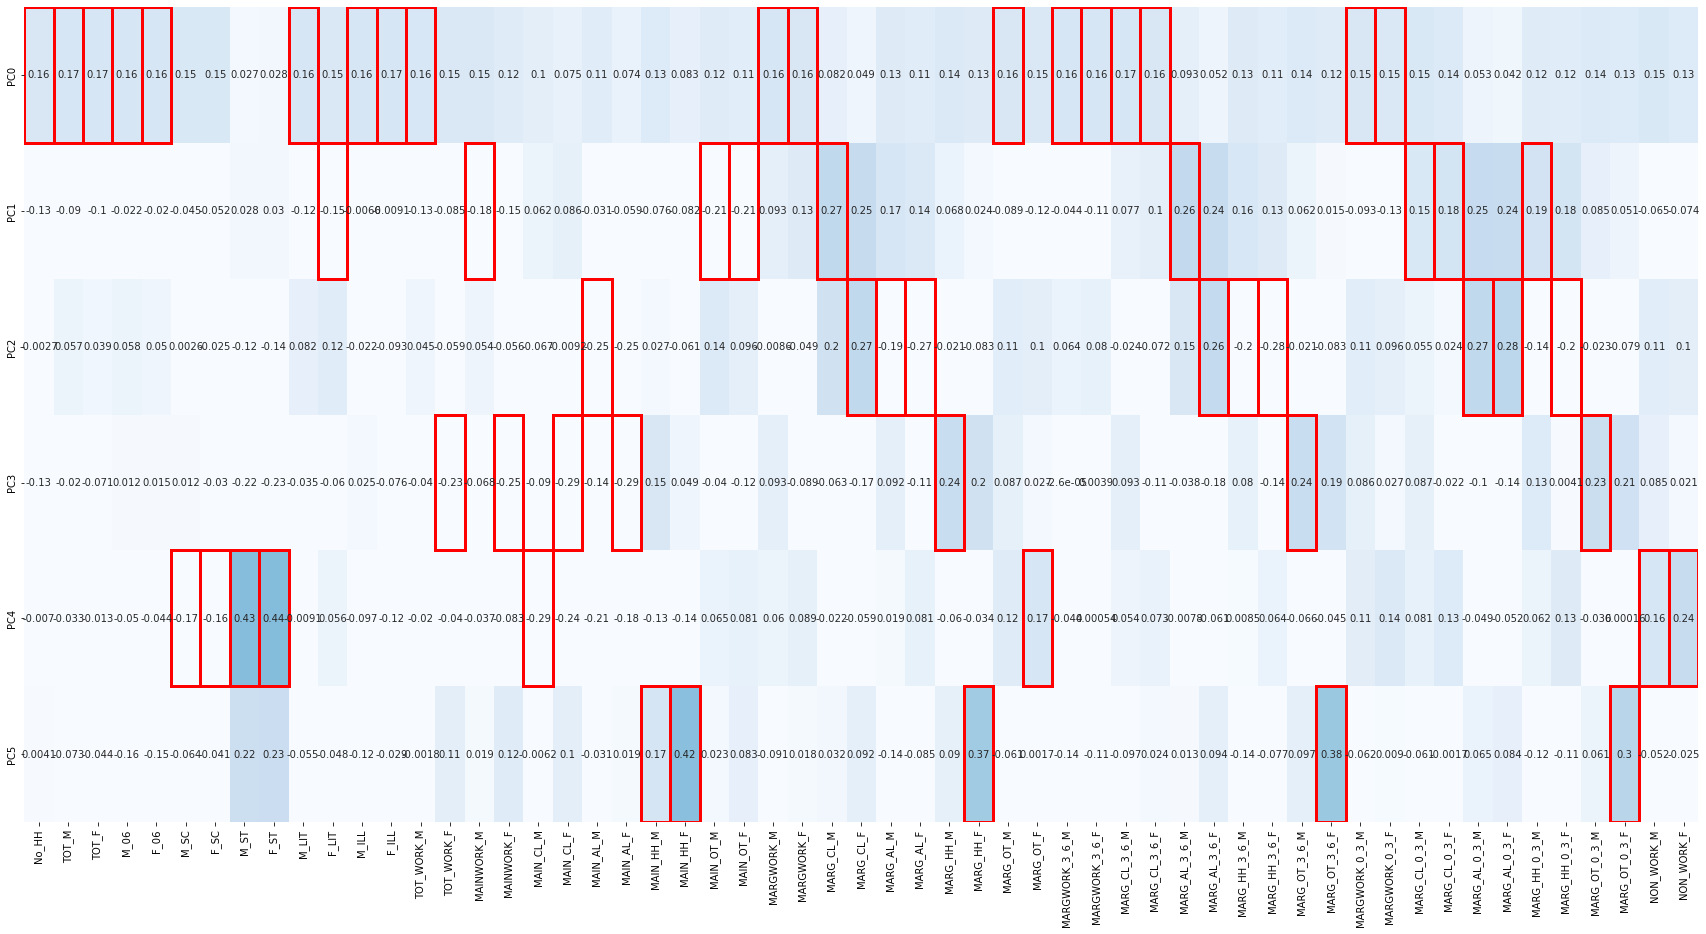

In [193]:
fig,ax = plt.subplots(figsize=(30, 15), facecolor='w', edgecolor='k')
ax = sns.heatmap(df1_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = df1_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df1_pca_loading.columns):
    position = df1_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

# Part 2 - PCA: Write linear equation for first PC

In [194]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',df_scaled.columns[i], end=' + ')


( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + ( 0.15 ) * F_SC + ( 0.03 ) * M_ST + ( 0.03 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.16 ) * M_ILL + ( 0.17 ) * F_ILL + ( 0.16 ) * TOT_WORK_M + ( 0.15 ) * TOT_WORK_F + ( 0.15 ) * MAINWORK_M + ( 0.12 ) * MAINWORK_F + ( 0.1 ) * MAIN_CL_M + ( 0.07 ) * MAIN_CL_F + ( 0.11 ) * MAIN_AL_M + ( 0.07 ) * MAIN_AL_F + ( 0.13 ) * MAIN_HH_M + ( 0.08 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.11 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.16 ) * MARGWORK_F + ( 0.08 ) * MARG_CL_M + ( 0.05 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.11 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.13 ) * MARG_HH_F + ( 0.16 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.17 ) * MARG_CL_3_6_M + ( 0.16 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.05 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.14 ) * MARG_OT_3_6_M + ( 0